In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
数据来自某交易平台的二手车交易记录
https://tianchi.aliyun.com/competition/entrance/231784/introduction
根据车辆属性（除了price字段），预测价格。

"""
# 载入数据
data = pd.read_csv('./used_car_train_20200313.csv',sep = ' ')
test = pd.read_csv('./used_car_testB_20200421.csv',sep = ' ')
data.head()
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [3]:
# 数据概览
data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [4]:
# 填充缺失值
data['bodyType'].value_counts()
data['bodyType'].fillna(8.0,inplace = True)
test['bodyType'].fillna(8.0,inplace = True)

In [5]:
# 填充缺失值
data['fuelType'].value_counts()
data['fuelType'].fillna(0.0,inplace = True)
test['fuelType'].fillna(0.0,inplace = True)

In [6]:
# 填充缺失值
data['gearbox'].value_counts()
data['gearbox'].fillna(0.0,inplace = True)
test['gearbox'].fillna(0.0,inplace = True)

In [7]:
# 查看缺失值情况
data.isnull().sum()
test.isnull().sum()

SaleID               0
name                 0
regDate              0
model                0
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
dtype: int64

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.346487
Kurtosis: 18.995183


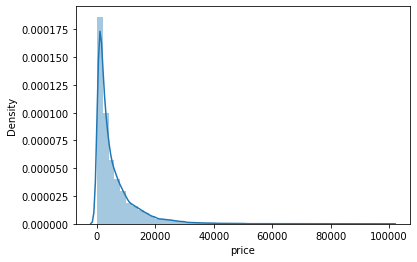

In [8]:
# 查看价格分布
sns.distplot(data['price'])
print('Skewness: %f'%data['price'].skew())
print('Kurtosis: %f'%data['price'].kurt())

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

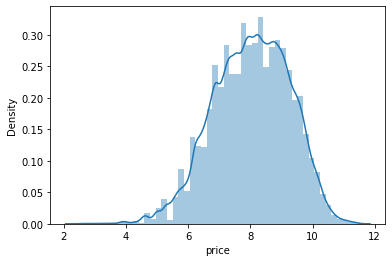

In [9]:
# 对数后分布
sns.distplot(np.log(data['price']))

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   909.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <BarContainer object of 10 artists>)

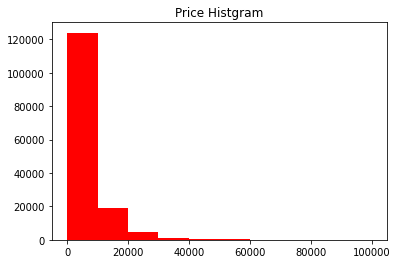

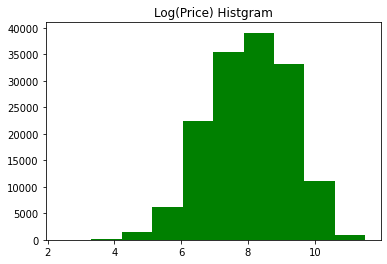

In [10]:
# 价格分布
plt.figure(1)
plt.title('Price Histgram')
plt.hist(data['price'],color = 'red')
plt.figure(2)
plt.title('Log(Price) Histgram')
plt.hist(np.log(data['price']),color = 'green')

In [11]:
# 处理'notRepairedDamage’异常值
data['notRepairedDamage'].value_counts()
data['notRepairedDamage'].replace('-','0.0',inplace = True)

In [12]:
# 处理'notRepairedDamage’异常值
test['notRepairedDamage'].value_counts()
test['notRepairedDamage'].replace('-','0.0',inplace = True)

In [13]:
#处理power异常值，最大值600
data['power'][data['power']>600] = 600
test['power'][test['power']>600] = 600

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# 计算车龄
data['regDate'].value_counts
data['regDate'] = data['regDate'].map(lambda x:int(str(x)[:4]))
test['regDate'].value_counts()
test['regDate'] = test['regDate'].map(lambda x:int(str(x)[:4]))

In [15]:
data['creatDate'].value_counts
data['creatDate'] = data['creatDate'].map(lambda x:int(str(x)[:4]))
test['creatDate'].value_counts()
test['creatDate'] = test['creatDate'].map(lambda x:int(str(x)[:4]))

In [16]:
data['carAge'] = data['creatDate'] - data['regDate']
#data['carAge']
test['carAge'] = test['creatDate'] - test['regDate']

In [17]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,carAge
0,0,736,2004,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12
1,1,2262,2003,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13
2,2,14874,2004,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12
3,3,71865,1996,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20
4,4,111080,2012,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4


In [18]:
# 转化数据类型
data = data.astype('float')
test = test.astype('float')

In [19]:
# 数字特征
numerical_cols = data.select_dtypes(exclude = 'object').columns
print('numerical_cols = \n',numerical_cols)

numerical_cols = 
 Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'carAge'],
      dtype='object')


In [20]:
# 类别特征
categorical_cols = data.select_dtypes(include = 'object').columns
print('categorical_cols = \n',categorical_cols)

categorical_cols = 
 Index([], dtype='object')


In [21]:
# 去掉无关特征
features_cols = numerical_cols.drop(['SaleID','name','regDate','creatDate','price'])

In [22]:
y_data = np.log(data['price'])
X_data = data[features_cols]

X_test = test[features_cols]
print('X_data shape:',X_data.shape)
print('X_test shape',X_test.shape)

X_data shape: (150000, 27)
X_test shape (50000, 27)


In [23]:
# 设定统计函数
def show_states(data):
    print('min:',np.min(data))
    print('max',np.max(data))
    print('ptp',np.ptp(data))
    print('mean',np.mean(data))
    print('std',np.std(data))
    print('var',np.var(data))    

In [24]:
# y_data的统计情况
show_states(y_data)

min: 2.3978952727983707
max 11.512915464920228
ptp 9.115020192121857
mean 8.034540468254402
std 1.2192347073599337
var 1.486533271631063


In [25]:
#切分数据集
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_data,y_data,test_size = 0.2,random_state = 9)

In [26]:
# 数据规范化
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)
X_test = ss.transform(X_test)

In [27]:
# xgboost模型训练
import xgboost as xgb

xgb_param = {'objective':'reg:squarederror',
          'eval_metric':'mae',
         'n_estimator':150,
         'learning_rate': 0.1,
         'gamma': 0,
         'subsample' : 0.8,
         'colsample_bytree': 0.9,
         'max_deepth' : 7}

xgb_train_data = xgb.DMatrix(X_train,y_train)
xgb_valid_data = xgb.DMatrix(X_valid,y_valid)

xgb_model = xgb.train(xgb_param,
                  xgb_train_data,evals = [(xgb_train_data,'train'),(xgb_valid_data,'valid')],
                  num_boost_round = 50000,
                  early_stopping_rounds = 200,
                  verbose_eval = 200)            

C:\Users\Administrator\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[08:55:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_deepth, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mae:6.78140	valid-mae:6.78183
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 200 rounds.
[200]	train-mae:0.12270	valid-mae:0.13492
[400]	train-mae:0.10920	valid-mae:0.12945
[600]	train-mae:0.10017	valid-mae:0.12715
[800]	train-mae:0.09321	valid-mae:0.12561
[1000]	train-mae:0.08696	valid-mae:0.12458
[1200]	train-mae:0.08162	valid-mae:0.12383
[1400]	train-mae:0.07698	valid-mae:0.12329
[1600]	train-mae:0.07300	valid-mae:0.12275
[1800]	train-mae:0.06933	valid-mae:0.12239
[2000]	train-mae:0.06614	valid-m

In [28]:
# xgb模型mae
from sklearn.metrics import mean_absolute_error

xgb_valid_data = xgb.DMatrix(X_valid)
y_valid_pred = xgb_model.predict(xgb_valid_data)

loss_xgb = mean_absolute_error(y_valid_pred,y_valid)
print(loss_xgb)

0.11858767090669395


In [29]:
#xgboost模型预测
xgb_test_data = xgb.DMatrix(X_test)
xgb_predict = xgb_model.predict(xgb_test_data)

In [30]:
# print(xgb_predict)

In [31]:
#lightgbm模型训练
import lightgbm as lgb

lgb_param = { 
    'max_depth':7,
    'learning_rate':0.1,
    'n_estimators':10000,
    'objective':'regression',
     'metric':'mae',
    'bagging_freq':8,
    
        }
lgb_train_data = lgb.Dataset(X_train,label = y_train)
lgb_valid_data = lgb.Dataset(X_valid,label = y_valid)

lgb_model = lgb.train(lgb_param,
                lgb_train_data,
                valid_sets = [lgb_train_data,lgb_valid_data],
                num_boost_round = 50000,
                early_stopping_rounds =200,
               verbose_eval =200)

C:\Users\Administrator\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[200]	training's l1: 0.128626	valid_1's l1: 0.13693
[400]	training's l1: 0.116041	valid_1's l1: 0.129925
[600]	training's l1: 0.10831	valid_1's l1: 0.126825
[800]	training's l1: 0.102199	valid_1's l1: 0.124908
[1000]	training's l1: 0.0973199	valid_1's l1: 0.123557
[1200]	training's l1: 0.0930387	valid_1's l1: 0.122504
[1400]	training's l1: 0.08909	valid_1's l1: 0.121652
[1600]	training's l1: 0.0856687	valid_1's l1: 0.121159
[1800]	training's l1: 0.0824372	valid_1's l1: 0.12067
[2000]	training's l1: 0.0794313	valid_1's l1: 0.120227
[2200]	training's l1: 0.0767057	valid_1's l1: 0.119841
[2400]	training's l1: 0.0742761	valid_1's l1: 0.119641
[2600]	training's l1: 0.0719282	valid_1's l1: 0.119392
[2800]	training's l1: 0.069632	valid_1's l1: 0.119114
[3000]	training's l1: 0.0674322	valid_1's l1: 0.118898
[3200]	training's l1: 0.0653338	valid_1's l1: 0.118794
[3400]	training's l1: 0.0633155	valid_1's l1: 0.118746
[3600]	training's

In [32]:
# lightgbm模型mae
loss_lgb = mean_absolute_error(lgb_model.predict(X_valid),y_valid)
print(loss_lgb)

0.11824830035188102


In [33]:
#lightgbm模型预测
# lgb_test_data = lgb.Dataset(X_test)
lgb_predict = lgb_model.predict(X_test)
# print(lgb_predict)

In [34]:
# 准备nn数据
import torch
from torch import nn

X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train = torch.from_numpy(np.array(y_train).reshape(-1,1)).type(torch.FloatTensor)
X_valid = torch.from_numpy(X_valid).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)

In [35]:
# 构建网络
nn_model = nn.Sequential(
    nn.Linear(len(features_cols),250),
    nn.ReLU(),
    nn.Linear(250,250),
    nn.ReLU(),
    nn.Linear(250,250),
    nn.ReLU(),
    nn.Linear(250,1)
)

# 定义优化器和损失函数
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(nn_model.parameters(),lr = 0.01)

# 模型训练
max_epoch = 150
iter_loss = []
for i in range(max_epoch):
    y_pred_train = nn_model(X_train)
    #计算loss
    loss = criterion(y_pred_train,y_train)
    #记录loss
    iter_loss.append(loss)
    #清空梯度
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #更新权值
    optimizer.step()

In [36]:
# print(iter_loss)

In [37]:
# nn模型测试
nn_valid = nn_model(X_valid)
nn_valid_pred = nn_valid.detach().numpy()
# print(len(nn_valid_pred[np.isnan(nn_valid_pred)]))
nn_valid_pred[np.isnan(nn_valid_pred)] = np.nanmean(nn_valid_pred)
print(len(nn_valid_pred[np.isnan(nn_valid_pred)]))
y_valid = np.array(y_valid).reshape(-1,1)
# y_valid
loss_nn = mean_absolute_error(nn_valid_pred,y_valid)
print(loss_nn)

0
0.3152700993603214


In [38]:
#nn模型预测
nn_pred = nn_model(X_test)
y_nn_pred = nn_pred.detach().numpy().flatten().tolist()
# print(len(y_nn_pred[np.isnan(y_nn_pred)]))
print(y_nn_pred)

[6.750606536865234, 7.23175573348999, 8.875813484191895, 6.922499656677246, 7.43365478515625, 6.678494930267334, 5.859535217285156, 7.928304672241211, 9.206884384155273, 6.138153076171875, 6.145563125610352, 7.554015636444092, 8.39998722076416, 8.749149322509766, 7.495190143585205, 5.419879913330078, 7.253289699554443, 8.808103561401367, 8.66534423828125, 6.127236366271973, 9.808073043823242, 8.6216402053833, 7.476557731628418, 7.145387172698975, 6.493648529052734, 8.65644645690918, 6.370217323303223, 9.166528701782227, 8.177301406860352, 8.716733932495117, 9.620575904846191, 8.945723533630371, 6.204925537109375, 9.346368789672852, 6.489890098571777, 7.209000110626221, 9.31639289855957, 8.46253776550293, 6.988288879394531, 5.562506675720215, 6.307549476623535, 9.68529224395752, 5.881006240844727, 8.66544246673584, 9.434713363647461, 6.174978256225586, 9.440155982971191, 9.476062774658203, 7.485943794250488, 7.713671684265137, 6.365605354309082, 8.104269981384277, 7.683028221130371, 6.1

In [39]:
# xgboost_lightgbm_nn模型融合
import gc
gc.collect()

loss_sum = loss_xgb + loss_lgb + loss_nn
w_xgb = 1 - loss_xgb/loss_sum
w_lgb = 1 - loss_lgb/loss_sum
w_nn = 1 - loss_nn/loss_sum
# print(w_xgb,w_lgb,w_nn)
predict = (w_xgb*xgb_predict + w_lgb*lgb_predict + w_nn*np.array(y_nn_pred))/3
# print(predict)

In [40]:
#生成提交文件
submit = pd.DataFrame(test['SaleID'])
# print(submit)
submit['price'] = np.exp(predict)
# print(submit)
submit.to_csv('./used_car_submit_xgb_lgb_nn.csv')